In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os


import warnings
warnings.filterwarnings('ignore')

# Any results you write to the current directory are saved as output.

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/IntroToDS/data1.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63024 entries, 0 to 63023
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         63015 non-null  object 
 1   description   62157 non-null  object 
 2   price         61205 non-null  object 
 3   square        60174 non-null  float64
 4   estate_type   63024 non-null  object 
 5   post_date     63024 non-null  object 
 6   post_id       63024 non-null  int64  
 7   link          63024 non-null  object 
 8   province      63024 non-null  object 
 9   district      63024 non-null  object 
 10  ward          63024 non-null  object 
 11  Tầng          47483 non-null  float64
 12  Số phòng ngủ  46756 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 6.3+ MB


In [ ]:
data.head()

,title,description,price,square,estate_type,post_date,post_id,link,province,district,ward,Tầng,Số phòng ngủ
0,Chính chủ cần bán nhà 2 mặt ngõ phố Hoàn Cầu P...,Tôi cần bán nhà 2 mặt ngõ phố Hoàn Cầu Phường ...,6800000000.0,45.5,Mua bán nhà riêng,2023-10-20,580302,https://bds.com.vn/chinh-chu-can-ban-nha-2-mat...,Hà Nội,Đống Đa,Ô Chợ Dừa,4.0,NaN
1,CHUẨN SỐNG SANG - KHÔNG GIAN AN LÀNH chỉ có tạ...,CHÍNH SÁCH BÁN HÀNG HẤP DẪN NHẤT CHỈ CÓ TẠI TÒ...,3000000000.0,108.0,Mua bán căn hộ chung cư,2023-10-01,97579,https://bds.com.vn/chuan-song-sang---khong-gia...,Hà Nội,Hai Bà Trưng,Vĩnh Tuy,NaN,3.0
2,"Bán nhà đẹp Bồ Đề 36 m2 x 3 tầng x 2,6 tỉ , ng...","Bán nhà đẹp Bồ Đề 36 m2 x 3 tầng x 2,6 tỉ , ng...",2600000000.0,36.0,Mua bán nhà riêng,2023-10-01,87277,https://bds.com.vn/ban-nha-dep-bo-de-36m2-x-3-...,Hà Nội,Long Biên,Bồ Đề,3.0,3.0
3,"Nhà Bồ Đề siêu đẹp 32 m2 x 5 tầng x 3,2 tỉ , ô...","Bán nhà Bồ Đề siêu đẹp 32 m2 x 5 tầng x 3,2 tỉ...",3200000000.0,32.0,Mua bán nhà riêng,2023-10-01,87627,https://bds.com.vn/nha-bo-de-sieu-dep-32m2-x-5...,Hà Nội,Long Biên,Bồ Đề,5.0,3.0
4,Nhà Phan Đình Phùng – 2 thoáng – Phân Lô – ô t...,Mô tả : Do chuyển sang nước ngoài định cư cùng...,9000000000.0,42.0,Mua bán nhà riêng,2023-10-01,93144,https://bds.com.vn/nha-phan-dinh-phung-%E2%80%...,Hà Nội,Hoàn Kiếm,Hàng Mã,NaN,NaN


In [ ]:
#chuyển từ object sang float
datanew = data[pd.to_numeric(data['price'], errors='coerce').notnull()]
datanew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60411 entries, 0 to 63023
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         60402 non-null  object 
 1   description   59561 non-null  object 
 2   price         60411 non-null  object 
 3   square        58122 non-null  float64
 4   estate_type   60411 non-null  object 
 5   post_date     60411 non-null  object 
 6   post_id       60411 non-null  int64  
 7   link          60411 non-null  object 
 8   province      60411 non-null  object 
 9   district      60411 non-null  object 
 10  ward          60411 non-null  object 
 11  Tầng          46733 non-null  float64
 12  Số phòng ngủ  45870 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 6.5+ MB


In [ ]:
datanew['price']= pd.to_numeric(datanew.price, errors='coerce')
datanew["post_date"] = pd.to_datetime(datanew["post_date"]).dt.strftime("%Y%m%d")
datanew['post_date'] = pd.to_numeric(datanew.post_date, errors='coerce')


datanew = datanew.drop('post_id', axis = 1)
datanew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60411 entries, 0 to 63023
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         60402 non-null  object 
 1   description   59561 non-null  object 
 2   price         60411 non-null  float64
 3   square        58122 non-null  float64
 4   estate_type   60411 non-null  object 
 5   post_date     60411 non-null  int64  
 6   link          60411 non-null  object 
 7   province      60411 non-null  object 
 8   district      60411 non-null  object 
 9   ward          60411 non-null  object 
 10  Tầng          46733 non-null  float64
 11  Số phòng ngủ  45870 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 6.0+ MB


In [ ]:
datanew = datanew[datanew['price'] < 1.060000e+11]
datanew = datanew[datanew['Số phòng ngủ'] < 10]
datanew = datanew[datanew['Tầng'] < 60]
datanew = datanew[datanew['square'] < 100]
datanew.describe()

,price,square,post_date,Tầng,Số phòng ngủ
count,3.655100e+04,36551.000000,3.655100e+04,36551.000000,36551.000000
mean,7.290830e+09,49.544136,2.022070e+07,4.844792,3.913846
std,7.355117e+09,16.663858,7.583930e+03,2.798087,1.465515
min,0.000000e+00,1.000000,2.019122e+07,1.000000,1.000000
25%,3.550000e+09,37.000000,2.022031e+07,4.000000,3.000000
50%,5.000000e+09,45.000000,2.022071e+07,5.000000,4.000000
75%,8.300000e+09,60.000000,2.023012e+07,5.000000,5.000000
max,1.050000e+11,99.000000,2.023111e+07,50.000000,9.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(datanew.filter(['price','square','Tầng','Số phòng ngủ']))

scaled_data

array([[0.0247619 , 0.35714286, 0.04081633, 0.25      ],
       [0.03047619, 0.31632653, 0.08163265, 0.25      ],
       [0.02095238, 0.39795918, 0.06122449, 0.375     ],
       ...,
       [0.08095238, 0.5       , 0.08163265, 0.375     ],
       [0.03285714, 0.34693878, 0.08163265, 0.25      ],
       [0.23619048, 0.90816327, 0.10204082, 1.        ]])

<Axes: title={'center': 'Log Normal'}>

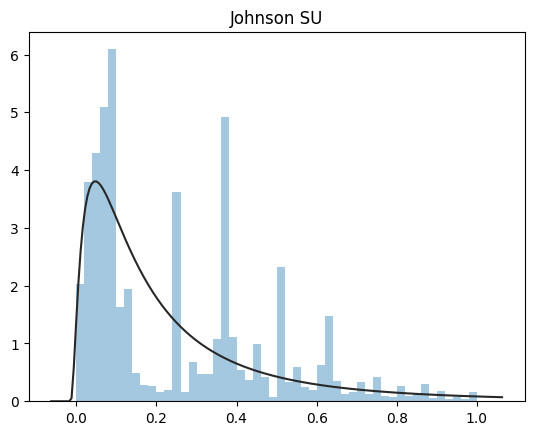

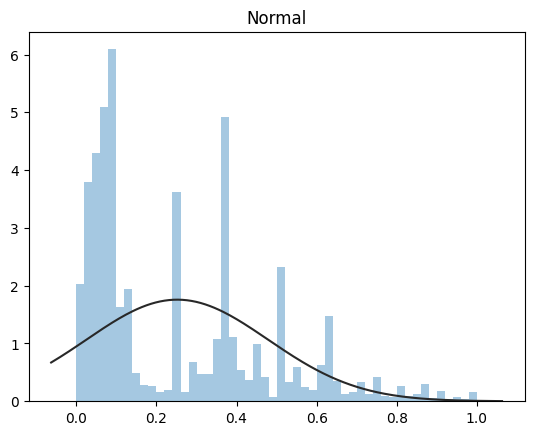

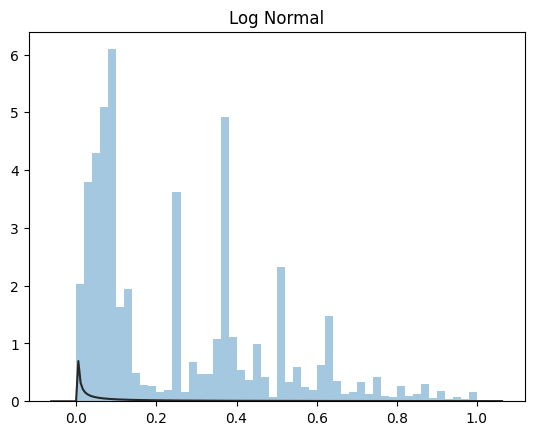

In [ ]:
y = scaled_data
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=stats.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)